In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as n
import matplotlib.pyplot as plt
import kagglehub
import pandas
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [16]:
#import dataset

dataset_path = kagglehub.dataset_download("kartikeybartwal/ecomerce-product-recommendation-dataset")
dataset_path = dataset_path + rf"\{os.listdir(dataset_path)[0]}"

print("Path to dataset:", dataset_path)


Path to dataset: C:\Users\USER\.cache\kagglehub\datasets\kartikeybartwal\ecomerce-product-recommendation-dataset\versions\1\content_based_recommendation_dataset.csv


In [17]:
data = pandas.read_csv(dataset_path)
data

,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person
0,12,4,4.2,male,500,4.5,PUMA,0.80,200,No,winter,plains,0.90
1,8,2,3.8,female,3000,3.2,Lee,-0.40,300,Yes,monsoon,mountains,0.20
2,25,10,4.5,female,600,4.8,Head Hunters,0.60,1000,No,spring,plains,0.70
3,6,1,2.1,female,100,2.5,Johnson & Johnson,0.10,300,No,summer,coastal,0.10
4,18,5,4.7,male,2000,4.3,Wakefit,0.90,700,Yes,winter,plains,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,5,1,1.8,male,200,2.0,Kama Ayurveda,-0.90,300,Yes,spring,coastal,0.01
1470,37,13,4.7,female,900,4.6,Johnson & Johnson,0.75,600,No,summer,plains,0.77
1471,22,8,3.9,male,4000,4.1,SleepyCat,0.60,900,Yes,winter,mountains,0.76
1472,40,15,4.8,female,700,4.9,Flying Machine,0.90,500,No,summer,mountains,0.82


In [ ]:
#preprocess data to encode the non numerical categories, as well as normalizing the numerical ones
#normalization is necessary such that categories with greater magnitudes, e.g price of product are not priortized by the model above 
#categories with smaller ones
#normalization preserves the numerical relationship between each entry in each category

numerical_features = ['Number of clicks on similar products', 'Number of similar products purchased so far', 'Average rating given to similar products', 'Median purchasing price (in rupees)', 'Rating of the product', 'Customer review sentiment score (overall)', 'Price of the product']
categorical_features = ['Gender', 'Brand of the product', 'Holiday', 'Season', 'Geographical locations']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

X = preprocessor.fit_transform(data)
y = data["Probability for the product to be recommended to the person"]

0       0.90
1       0.20
2       0.70
3       0.10
4       0.80
        ... 
1469    0.01
1470    0.77
1471    0.76
1472    0.82
1473    0.41
Name: Probability for the product to be recommended to the person, Length: 1474, dtype: float64


In [ ]:
#now we can define our model, a simple dense neural network
model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # output is probability
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               8576      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
30/30 [==============================] - 1s 19ms/step - loss: 2.5015e-04 - mae: 0.0112 - accuracy: 0.1941 - val_loss: 0.0063 - val_mae: 0.0394 - val_accuracy: 0.1695
Epoch 2/30
30/30 [==============================] - 0s 10ms/step - loss: 2.2286e-04 - mae: 0.0104 - accuracy: 0.1941 - val_loss: 0.0060 - val_mae: 0.0390 - val_accuracy: 0.1695
Epoch 3/30
30/30 [==============================] - 0s 7ms/step - loss: 2.1463e-04 - mae: 0.0099 - accuracy: 0.1941 - val_loss: 0.0061 - val_mae: 0.0382 - val_accuracy: 0.1695
Epoch 4/30
30/30 [==============================] - 0s 11ms/step - loss: 1.5778e-04 - mae: 0.0084 - accuracy: 0.1941 - val_loss: 0.0063 - val_mae: 0.0386 - val_accuracy: 0.1695
Epoch 5/30
30/30 [==============================] - 0s 7ms/step - loss: 1.5993e-04 - mae: 0.0084 - accuracy: 0.1941 - val_loss: 0.0059 - val_mae: 0.0381 - val_accuracy: 0.1695
Epoch 6/30
30/30 [==============================] - 0s 7ms/step - loss: 1.8670e-04 - mae: 0.0095 - accuracy: 0.1941 -

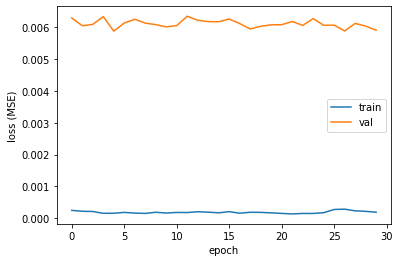

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)

history = model.fit(X_train.toarray(), y_train.to_numpy(), validation_split=0.2, epochs=30, batch_size=32)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "val"])
plt.xlabel("epoch")
plt.ylabel("loss (MSE)")
plt.show()


 1/10 [==>...........................] - ETA: 0s

10/10 [==============================] - 0s 4ms/step
Actual: 0.25, Predicted: 0.28
Actual: 1.00, Predicted: 0.99
Actual: 0.80, Predicted: 0.91
Actual: 0.05, Predicted: 0.29
Actual: 0.90, Predicted: 0.90
Actual: 1.00, Predicted: 1.00
Actual: 0.60, Predicted: 0.62
Actual: 0.90, Predicted: 0.89
Actual: 0.80, Predicted: 0.80
Actual: 0.90, Predicted: 0.81
Actual: 1.00, Predicted: 1.00
Actual: 0.90, Predicted: 0.90
Actual: 0.70, Predicted: 0.71
Actual: 0.20, Predicted: 0.20
Actual: 0.02, Predicted: 0.02
Actual: 0.95, Predicted: 0.96
Actual: 0.05, Predicted: 0.03
Actual: 0.03, Predicted: 0.03
Actual: 1.00, Predicted: 0.99
Actual: 0.90, Predicted: 0.91
Actual: 1.00, Predicted: 0.99
Actual: 0.10, Predicted: 0.10
Actual: 1.00, Predicted: 0.98
Actual: 1.00, Predicted: 0.99
Actual: 1.00, Predicted: 1.00
Actual: 0.90, Predicted: 0.87
Actual: 0.85, Predicted: 0.92
Actual: 0.90, Predicted: 0.89
Actual: 0.10, Predicted: 0.16
Actual: 0.90, Predicted: 0.90
Actual: 0.90, Predicted: 0.91
Actual: 0.30, Pre

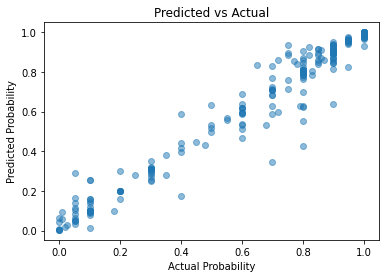

In [51]:
predictions = model.predict(X_test)


# Compare predictions vs actuals (first 10 for example)
for actual, pred in zip(y_test, predictions):
    print(f"Actual: {actual:.2f}, Predicted: {pred[0]:.2f}")
    
predictions = predictions.flatten()

# Calculate MAE
mae = n.mean(n.abs(y_test - predictions))
print("MAE:", mae)

plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Probability")
plt.ylabel("Predicted Probability")
plt.title("Predicted vs Actual")
plt.show()